In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
from keras.models import Sequential
from keras.layers import Dense
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [13]:
from tensorflow.keras.datasets import boston_housing

In [14]:
(X_train,y_train),(X_test,y_test)=boston_housing.load_data()

In [15]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
model = Sequential()
model.add(Dense(128, input_dim=13, activation='relu'))
model.add(Dense(64, activation='relu'))
#Output layer
model.add(Dense(1, activation='linear'))

In [17]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               1792      
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 10,113
Trainable params: 10,113
Non-trainable params: 0
_________________________________________________________________


In [18]:
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs =100)

Epoch 1/100
11/11 [==============================] - 1s 14ms/step - loss: 546.1136 - mae: 21.5128 - val_loss: 577.2201 - val_mae: 22.2198
Epoch 2/100
11/11 [==============================] - 0s 4ms/step - loss: 484.5404 - mae: 20.0160 - val_loss: 503.6900 - val_mae: 20.5376
Epoch 3/100
11/11 [==============================] - 0s 4ms/step - loss: 410.5581 - mae: 18.1029 - val_loss: 408.1864 - val_mae: 18.1550
Epoch 4/100
11/11 [==============================] - 0s 4ms/step - loss: 313.4619 - mae: 15.4475 - val_loss: 297.5050 - val_mae: 14.9577
Epoch 5/100
11/11 [==============================] - 0s 5ms/step - loss: 211.2010 - mae: 12.0558 - val_loss: 184.8123 - val_mae: 10.8618
Epoch 6/100
11/11 [==============================] - 0s 4ms/step - loss: 122.5672 - mae: 8.5262 - val_loss: 108.8370 - val_mae: 7.8003
Epoch 7/100
11/11 [==============================] - 0s 4ms/step - loss: 74.7336 - mae: 6.5641 - val_loss: 77.7618 - val_mae: 6.6422
Epoch 8/100
11/11 [===========================

11/11 [==============================] - 0s 4ms/step - loss: 8.6356 - mae: 2.0922 - val_loss: 15.1969 - val_mae: 2.6972
Epoch 63/100
11/11 [==============================] - 0s 4ms/step - loss: 8.9283 - mae: 2.1435 - val_loss: 15.1195 - val_mae: 2.6519
Epoch 64/100
11/11 [==============================] - 0s 4ms/step - loss: 8.4423 - mae: 2.0667 - val_loss: 14.7504 - val_mae: 2.7195
Epoch 65/100
11/11 [==============================] - 0s 4ms/step - loss: 8.3361 - mae: 2.0347 - val_loss: 14.4203 - val_mae: 2.6453
Epoch 66/100
11/11 [==============================] - 0s 4ms/step - loss: 8.6710 - mae: 2.0979 - val_loss: 16.7929 - val_mae: 2.8481
Epoch 67/100
11/11 [==============================] - 0s 3ms/step - loss: 8.7228 - mae: 2.0936 - val_loss: 15.3146 - val_mae: 2.7680
Epoch 68/100
11/11 [==============================] - 0s 4ms/step - loss: 8.2620 - mae: 2.0197 - val_loss: 14.7147 - val_mae: 2.6677
Epoch 69/100
11/11 [==============================] - 0s 4ms/step - loss: 8.1402 -

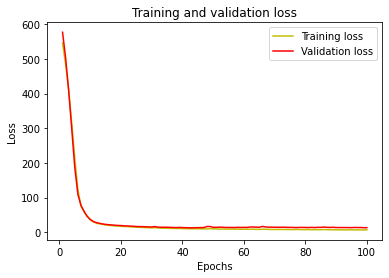

In [19]:
from matplotlib import pyplot as plt
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [20]:
mse_neural, mae_neural = model.evaluate(X_test_scaled, y_test)
print('Mean squared error from neural net: ', mse_neural)
print('Mean absolute error from neural net: ', mae_neural)

4/4 [==============================] - 0s 2ms/step - loss: 22.2137 - mae: 2.8687
Mean squared error from neural net:  22.21367073059082
Mean absolute error from neural net:  2.8687188625335693


In [21]:
predictions = model.predict(X_test_scaled[:5])
print("Predicted values are: ", predictions)
print("Real values are: ", y_test[:5])

1/1 [==============================] - 0s 50ms/step
Predicted values are:  [[ 8.745275]
 [17.944738]
 [21.336235]
 [32.972153]
 [25.586637]]
Real values are:  [ 7.2 18.8 19.  27.  22.2]


In [22]:
lr_model = linear_model.LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
print('Mean squared error from linear regression: ', mse_lr)
print('Mean absolute error from linear regression: ', mae_lr)

Mean squared error from linear regression:  23.195599256422977
Mean absolute error from linear regression:  3.4641858124067166
